<a href="https://colab.research.google.com/github/AlexanderAvocone/Project/blob/master/Datenanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Übung 1**
Ziel der Übung ist die Datenanalyse von der Titanic-challenge

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Als erstes müssen die Daten geladen und grob überflogen werden um sich einen Eindruck über die Einträge zu verschaffen

In [71]:
#Daten laden
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")


#Overview der Daten
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
#Datentyp der Columns mit Angabe der NaN-Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




Wie zu sehen sind die Cabin-Einträge zu mehr als 3/4 nicht vorhanden. 
Hier wäre es ratsam die Spalte einfach komplett zu löschen, da sie fürs training unbrauchbar ist.

Auch ist die Ticket-Spalte unbrauchbar.


In [73]:
train["Ticket"].sample(20)


211         F.C.C. 13528
157      SOTON/OQ 392090
599             PC 17485
491     SOTON/OQ 3101317
525               367232
802               113760
825               368323
18                345763
145           C.A. 33112
115    STON/O 2. 3101294
586               237565
598                 2664
880               230433
654               365226
590    STON/O 2. 3101273
750                29103
445                33638
139             PC 17593
861                28134
774                29105
Name: Ticket, dtype: object

In [74]:
train.drop(["Cabin","Ticket"],axis=1, inplace = True)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

Um ein Gespür für die Daten zu erhalten ist die Visualisierung ein guter Anfang.
Vorallem die Anzahl der Überlebenden sortiert nach Geschlecht und Alter wäre interessant.


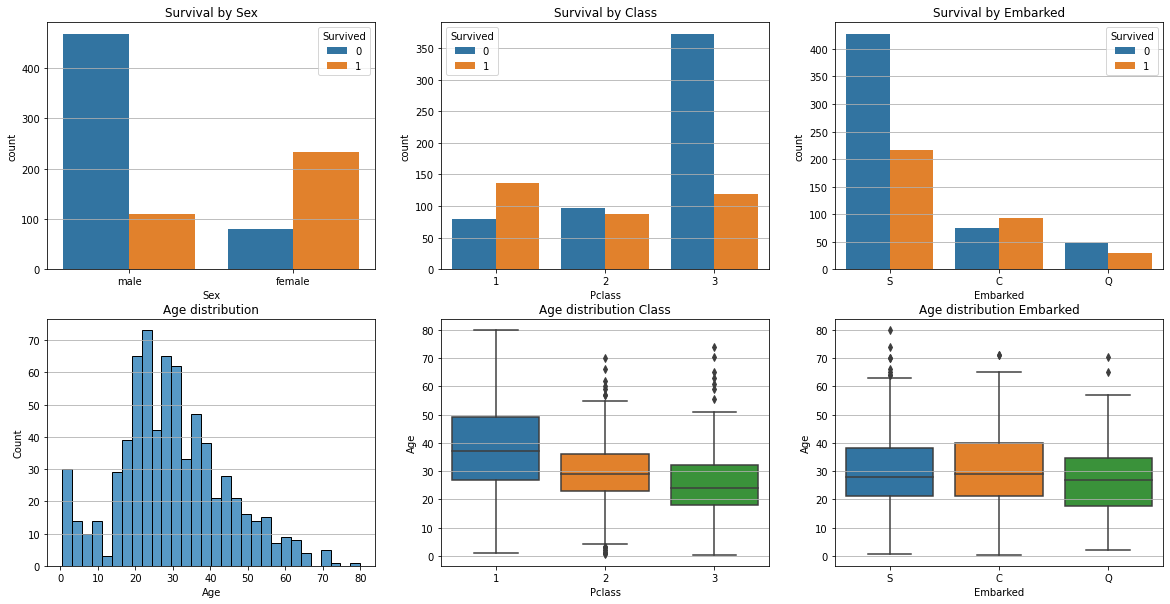

In [120]:
f,ax = plt.subplots(2,3,figsize=(20,10))


#Survived Sex
plt.subplot(2,3,1)
sns.countplot(x="Sex", data = train, hue = "Survived")
plt.title("Survival by Sex")
plt.grid(axis ="y")

#Survived Class
plt.subplot(2,3,2)
sns.countplot(x="Pclass", data = train, hue = "Survived")
plt.title("Survival by Class")
plt.grid(axis ="y")

#Survived Embarked
plt.subplot(2,3,3)
sns.countplot(x="Embarked", data = train, hue = "Survived")
plt.title("Survival by Embarked")
plt.grid(axis ="y")

#Age
plt.subplot(2,3,4)
sns.histplot(train["Age"], bins = 30, kde = False) # kde = die Ausgleichskurve
plt.title("Age distribution")
plt.grid(axis ="y")

#Age Class
plt.subplot(2,3,5)
sns.boxplot(x = train["Pclass"],y = train["Age"])
plt.title("Age distribution Class")
plt.grid(axis ="y")

#Age Embarked
plt.subplot(2,3,6)
sns.boxplot(x = train["Embarked"],y = train["Age"])
plt.title("Age distribution Embarked")
plt.grid(axis ="y")





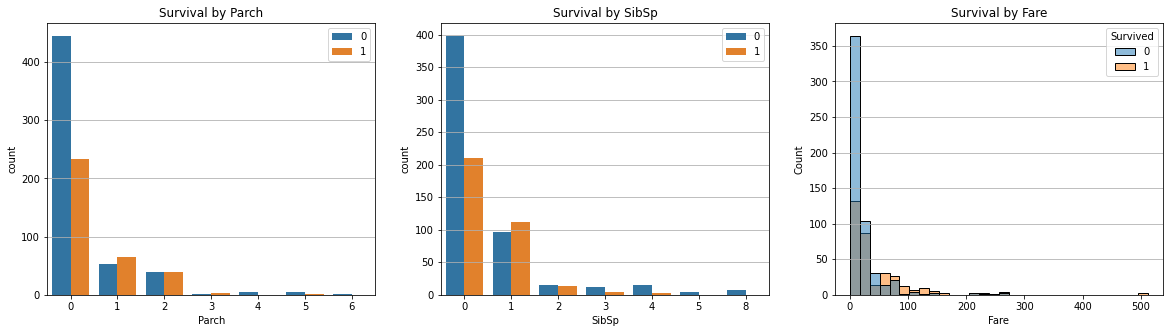

In [129]:
f,ax = plt.subplots(1,3,figsize=(20,5))
#Survived Parch
plt.subplot(1,3,1)
sns.countplot(x="Parch", data = train, hue = "Survived")
plt.title("Survival by Parch")
plt.grid(axis ="y")
plt.legend(loc = "upper right")

#Survived SibSp
plt.subplot(1,3,2)
sns.countplot(x="SibSp", data = train, hue = "Survived")
plt.title("Survival by SibSp")
plt.grid(axis ="y")
plt.legend(loc = "upper right")

#Survived Fare
plt.subplot(1,3,3)
sns.histplot(x="Fare", data = train, hue = "Survived", bins = 30)
plt.title("Survival by Fare")
plt.grid(axis ="y")



Als nächstes müssen wir nun die verbleibenden Daten für die statistischen Modelle vorbereiten, da die Modelle nur Zahlenwerte verarbeiten können.
Für "Sex" bietet sich eine binäre Einteilung ein.
Das geht entweder durch df.get_dummies(), df.replace() oder die df.apply() Funktionen

In [53]:
#Ersetzen der Einträge mit binären Werten mittels dummys
train["Sex"] = pd.get_dummies(train["Sex"], drop_first = True)


In [65]:
#replace-Funktion mittels dictionary
train["Sex"].replace({"male":1, "female":0})

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [69]:
#apply mittels lambda-Funktion und dictionary
sex = {"male":1, "female":0}
train["Sex"].apply(lambda x:sex[x] )

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64